### Importing Libraries:

In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt

### Importing Dataset:

In [2]:
titanic = pd.read_csv("data/train.csv")

### Checking the dataset:

In [3]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### General info about the data:

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Checking for total number of null values:

In [5]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Basic statistical details:

In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Finding the zero values in Fare column 

In [7]:
fare0 = titanic.query("Fare == 0")

In [8]:
fare0

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


There are 15 observations with "Fare" recorded as zero and I'd like to correct them. I will use the Ticket class ("Pclass") and port of embarkation ("Embarked") to estimate the missing fare values.

In [9]:
# Grouping by Pclass and Embarked to get the mean Fare prices for different classes and embarkation locations:
fares = titanic.groupby(["Pclass", "Embarked"])[['Fare']].mean()
fares

Fare
Pclass Embarked            
1      C         104.718529
       Q          90.000000
       S          70.364862
2      C          25.358335
       Q          12.350000
       S          20.327439
3      C          11.214083
       Q          11.183393
       S          14.644083

In [10]:
def fill_fare(pclass):
    """
    Input: Int
    Output: Float
    
    Receive the class number of the passenger and returns the average fare for the class and place 
    of embarkment.
    """
    global fares
    if pclass == 1:
        return round(fares.loc[1, 'S']['Fare'], 2)
    elif pclass == 2:
        return round(fares.loc[2, 'S']['Fare'], 2)
    else:
        return round(fares.loc[3, 'S']['Fare'], 2)
    
    

In [11]:
# Changing the Fare price for the rows that had a 0 in it.
fare0['Fare'] = fare0['Pclass'].apply(fill_fare)

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
titanic.update(fare0)

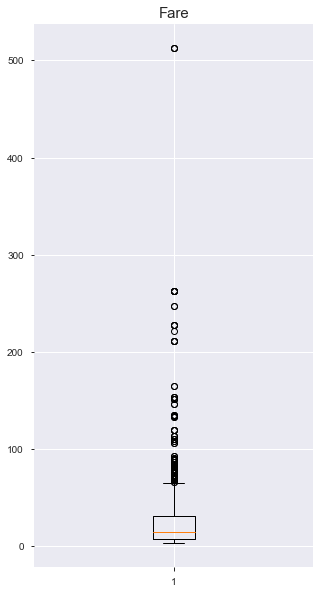

In [13]:
fig, ax = plt.subplots(figsize = (5,10))
ax.set_title('Basic Plot')
ax.boxplot(titanic.Fare)
ax.set_title("Fare", fontsize = 15)
plt.show()

### Finding missing Embarked values

In [14]:
titanic[titanic.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62.0,1.0,1.0,"Icard, Miss. Amelie",female,38.0,0.0,0.0,113572,80.0,B28,NaN
829,830.0,1.0,1.0,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0.0,0.0,113572,80.0,B28,NaN


In [15]:
# Finding the means of 1st class fares embarked from different ports:
titanic.query("Pclass == 1").groupby(["Embarked"])["Fare"].mean()

Embarked
C    104.718529
Q     90.000000
S     73.134941
Name: Fare, dtype: float64

Two people with missing cabin values both have 1st class tickets and they both paid 80 Dollars, so looking at the means above, we can see that the closest we have to $80 is "S", which is the Southampton port. So we can assign these two missing Embark values as "S".

In [16]:
replace = {'Embarked': "S"}
titanic.fillna(value=replace, inplace=True)

### In cabin values, 75% of the values are missing, so it's better to drop them:

In [17]:
titanic.drop(columns="Cabin", inplace=True)

In [18]:
titanic.dtypes

PassengerId    float64
Survived       float64
Pclass         float64
Name            object
Sex             object
Age            float64
SibSp          float64
Parch          float64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [19]:
titanic.astype({"PassengerId": "int", "Survived": "int", "Pclass": "int", "SibSp": "int", "Parch": "int"})

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


### Dropping rows with missing age values:

In [20]:
titanic.dropna(subset=["Age"], inplace=True)

It's better to drop the rows with missing age values, as it would be misleading to fill them with the mean

### Checking the overview of the dataset for the last time:

In [21]:
titanic.profile_report()

### Exporting the final and cleaned dataset:

In [22]:
titanic.to_csv("titanic-cleaned.csv")

PermissionError: [Errno 13] Permission denied: 'titanic-cleaned.csv'

In [ ]:
# biostat.mc.vanderbilt.edu › wiki › pub › Main › DataSets › titanic3